# Исследование сервиса аренды самокатов GoFast. Проверка гипотез о поведении пользователей.

Исследуем данные сервиса аренды самокатов GoFast о пользователях из нескольких городов, а также об их поездках. Проанализируем данные, проведем тесты, проверим некоторые гипотезы, которые могут помочь бизнесу вырасти.

Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:

-	**без подписки** 

	абонентская плата отсутствует;

	стоимость одной минуты поездки — 88 рублей;

	стоимость старта (начала поездки) — 50 рублей;
    

-	**с подпиской Ultra** 

	абонентская плата — 199 рублей в месяц;

	стоимость одной минуты поездки — 66 рублей;

	стоимость старта — бесплатно.

**Описание данных:**

В основных данных есть информация о пользователях, их поездках и подписках.

Пользователи — users_go.csv

	
- user_id	уникальный идентификатор пользователя

- name	имя пользователя

- age	возраст

- city	город

- subscription_type	тип подписки (free, ultra)


Поездки — rides_go.csv

	
- user_id	уникальный идентификатор пользователя

- distance	расстояние, которое пользователь проехал в текущей сессии (в метрах)

- duration	продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»

- date	дата совершения поездки


Подписки — subscriptions_go.csv

	
- subscription_type	тип подписки

- minute_price	стоимость одной минуты поездки по данной подписке

- start_ride_price	стоимость начала поездки

- subscription_fee	стоимость ежемесячного платежа



**Цели проекта:** Провести исследовательский и статистический анализ данных о пользователях и поездках, выявив ключевые характеристики, такие как частота встречаемости городов и соотношение пользователей с подпиской и без подписки. Анализ выручки и проверки гипотез, связанных с поведением пользователей и их влиянием на бизнес-модель сервиса.

**План работы:** 

1. Загрузка и изучение данных:

   - Считать CSV-файлы с данными с помощью библиотеки pandas и сохраните их в датафреймы. Пути к файлам:
	     /datasets/users_go.csv
	     /datasets/rides_go.csv
	     /datasets/subscriptions_go.csv
   - Вывести первые строки каждого набора данных. Изучить общую информацию о каждом датафрейме.


2. Предобработка данных

   - Привести столбец date к типу даты pandas.
   - Создать новый столбец с номером месяца на основе столбца date.
   - Проверить наличие пропущенных значений и дубликатов в датафреймах. Обработать их, если такие значения присутствуют.
   

3. Исследовательский анализ данных:

   - Частота встречаемости городов.
   - Соотношение пользователей с подпиской и без подписки.
   - Возраст пользователей.
   - Расстояние, преодолеваемое за одну поездку.
   - Продолжительность поездок.
   

4. Объединение данных:

   - Использование метода merge() для объединения данных о пользователях, поездках и подписках.
   - Создание отдельных датафреймов для пользователей с подпиской и без нее.
   - Визуализация расстояния и времени поездок для обеих категорий.
   

5. Подсчёт выручки:

   - Создание агрегированного датафрейма с суммарным расстоянием, количеством поездок и временем за месяц.
   - Добавление столбца с помесячной выручкой на основе условий оплаты.
   

6. Проверка гипотез:

   - Анализ времени поездок пользователей с подпиской по сравнению с пользователями без подписки.
   - Проверка, превышает ли среднее расстояние поездки пользователей с подпиской 3130 метров.
   - Сравнение помесячной выручки от пользователей с подпиской и без подписки.
   - Определение теста для проверки гипотезы о снижении обращений в техподдержку после обновления серверов.
   
   
7. Дополнительные задания.

## Загрузка и изучение данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
from scipy.stats import binom, norm
from scipy import stats as st

In [2]:
users = pd.read_csv('users_go.csv')
users.head(10)

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
5,6,Регина,25,Краснодар,ultra
6,7,Игорь,23,Омск,ultra
7,8,Юрий,23,Краснодар,ultra
8,9,Ян,21,Пятигорск,ultra
9,10,Валерий,18,Екатеринбург,ultra


In [3]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


In [4]:
rides = pd.read_csv('rides_go.csv')
rides.head(10)

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28
5,1,2770.890808,16.650138,2021-10-09
6,1,3039.020292,14.927879,2021-10-19
7,1,2842.118050,23.117468,2021-11-06
8,1,3412.690668,15.238072,2021-11-14
9,1,748.690645,15.041884,2021-11-22


In [5]:
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


In [6]:
subscriptions = pd.read_csv('subscriptions_go.csv')
subscriptions.head()

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [7]:
subscriptions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 196.0+ bytes


**Вывод: Подключены необходимые библиотеки для работы с данными и визуализации (Pandas, Matplotlib, Seaborn, NumPy, SciPy).
Созданы три датафрейма. Данные включают информацию о 1565 пользователях, 18068 поездках и двух типах подписок.**

## Предобработка данных

### преобразуем столбец date к типу datetime с помощью pd.to_datetime

In [8]:
rides['date'] = pd.to_datetime(rides['date'])
rides.dtypes

user_id              int64
distance           float64
duration           float64
date        datetime64[ns]
dtype: object

### Создадим новый столбец с номером месяца

In [9]:
rides['month'] = rides['date'].dt.month

### Проверим и обработаем пропущенные значений и дубликаты в датафреймах. 

In [10]:
users.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

In [11]:
rides.isna().sum()

user_id     0
distance    0
duration    0
date        0
month       0
dtype: int64

In [12]:
subscriptions.isna().sum()

subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

**Нет пропущенных значений ни в одном из трех датафреймах. Их отсутствие говорит о том, что данные были собраны и записаны корректно.**

**Посмотрим, есть ли дубликаты.**

In [13]:
users.duplicated().sum()

31

Небольшое количество дубликатов присутствует, что может свидетельствовать о том, что данные в целом собраны качественно, но все же есть небольшие проблемы в процессе сбора данных, возможно, ошибки ввода или неправильное объединение источников данных. Дубликаты могут искажать результаты анализа, привести к неверным выводам или перекосу в моделировании. Поэтому удаляем дубликаты.

In [14]:
users = users.drop_duplicates().reset_index(drop='True')
len(users) #проверяем, сколько строк осталось

1534

In [15]:
rides.duplicated().sum()

0

In [16]:
subscriptions.duplicated().sum()

0

В  датафреймах rides и subscriptions дубликаты не найдены, данные были собраны и записаны корректно.

**Вывод: в процессе предобработки данных было сделано:**

**- Преобразование столбца date к типу datetime.**


**- Создан новый столбец с номером месяца month, что понадобится в дальнейшем для аггрегации данных по пользователю и месяцу.**


**- Проверка на наличие пропущенных значений в каждом из датафреймов. Нет пропущенных значений ни в одном из трех датафреймах.**


**- Проверка и обработка дубликатов: обнаружен 31 дубликат в датафрейме users, дубликаты обработаны.**

## Исследовательский анализ данных

**Опишем и визуализируем общую информацию о пользователях и поездках.**

### Частота встречаемости городов

In [17]:
def bar_plot(df, column, w):
    plt.figure(figsize=(w, 6))
    ax = sns.countplot(x=column, data=df, color='skyblue')

    total = len(df) 
    for p in ax.patches:
        height = p.get_height()  # Высота столбца
        percentage = (height / total) * 100  # Вычисление процента
        ax.annotate(f'{percentage:.1f}%', 
                    (p.get_x() + p.get_width() / 2., height), 
                    ha='center', va='bottom')

    plt.title(f'Частота встречаемости для {column}')
    plt.xlabel(f'Значения {column}')
    plt.ylabel('Количество наблюдений')
    plt.grid(True)
    plt.show()

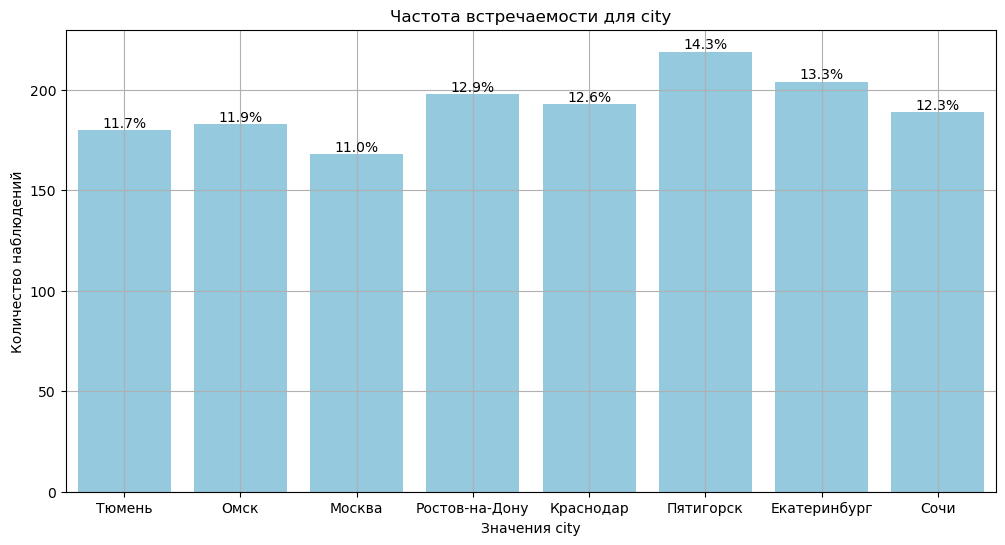

In [18]:
bar_plot(users, 'city', 12)

На основе гистограммы можно сделать следующие выводы:

1. Лидеры по количеству пользователей: Пятигорск занимает первое место с 226 пользователями, что свидетельствует о высокой популярности сервиса в этом городе. Екатеринбург и Ростов-на-Дону следуют за ним с 206 и 202 пользователями соответственно.


2. Городам Краснодар (196) и Сочи (192) также удается привлечь значительное количество пользователей, что может указывать на активное использование сервиса в южных регионах.


3. Низкий показатель в Москве. Несмотря на свой статус крупного города, имеет только 172 пользователя, что может указывать на высокую конкуренцию или недостаток маркетинга в этом регионе.


### Cоотношение пользователей с подпиской и без подписки

Подсчитаем количество пользователей с подпиской и без подписки.

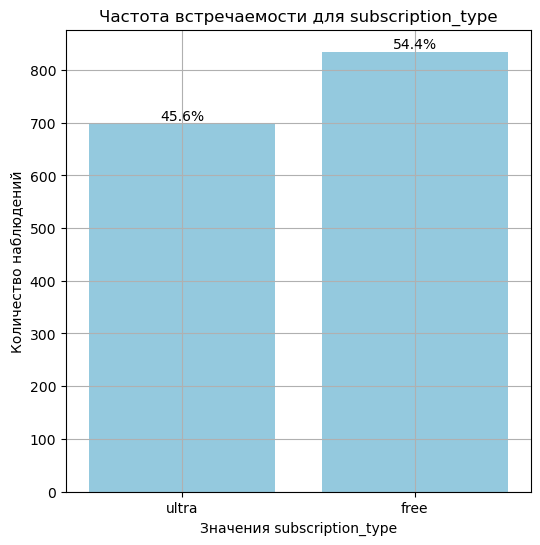

In [19]:
bar_plot(users, 'subscription_type', 6)

Большинство пользователей предпочитают пользоваться сервисом без подписки.

### Расстояние, которое пользователь преодолел за одну поездку

Построим гистограмму расстояния, которое пользователь преодолел за одну поездку.

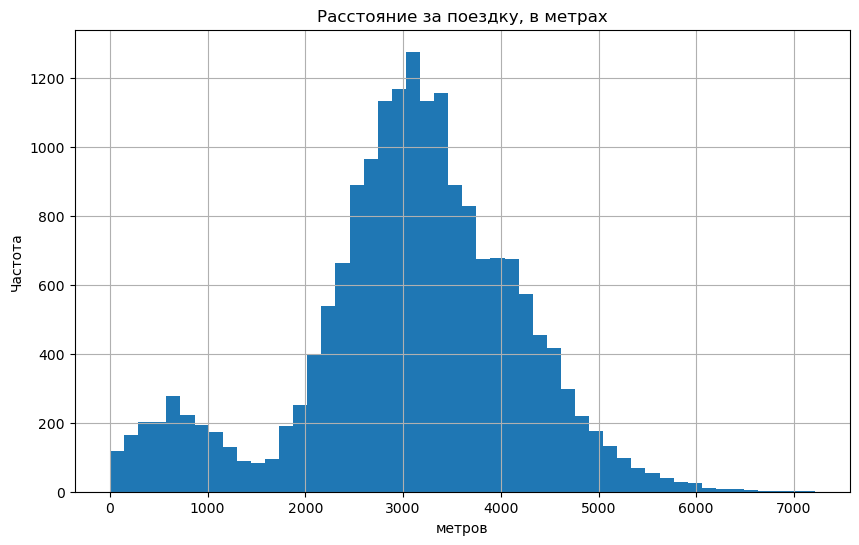

In [20]:
plt.figure(figsize=(10, 6))

rides['distance'].plot(kind='hist', bins=50)

plt.grid(axis='y')  
plt.grid(axis='x')  
plt.title('Расстояние за поездку, в метрах')
plt.xlabel('метров')
plt.ylabel('Частота')

plt.show()

На графике видно два пика 600 и 3100 метров. Можно предположить, что пользователи часто арендуют самокат для того, чтобы доехать до какого-то близкого транспортного объекта, остановки или станции метро (первый пик), либо для длительной прогулки в свободное время (второй пик). Самыми частыми оказались поездки протяженностью примерно 3100 м.

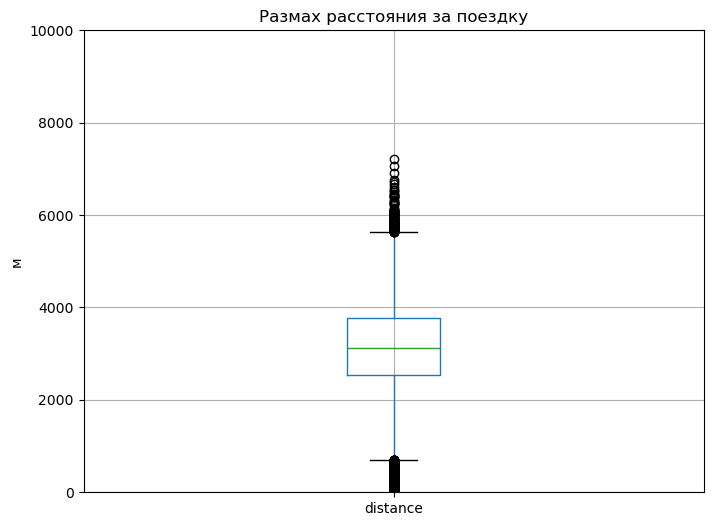

In [21]:
rides.boxplot(column='distance', figsize=(8, 6))
plt.title('Размах расстояния за поездку')
plt.ylim(0, 10000)
plt.ylabel('м')
plt.show()

In [22]:
count = (rides['distance'] < 500).sum()
print(count)
count = (rides['distance'] >5800).sum()
print(count)

562
81


В целом данные по расстоянию за поездку выглядят корректными.

### Продолжительность поездок

Построим гистограмму расстояния, которое пользователь преодолел за одну поездку.

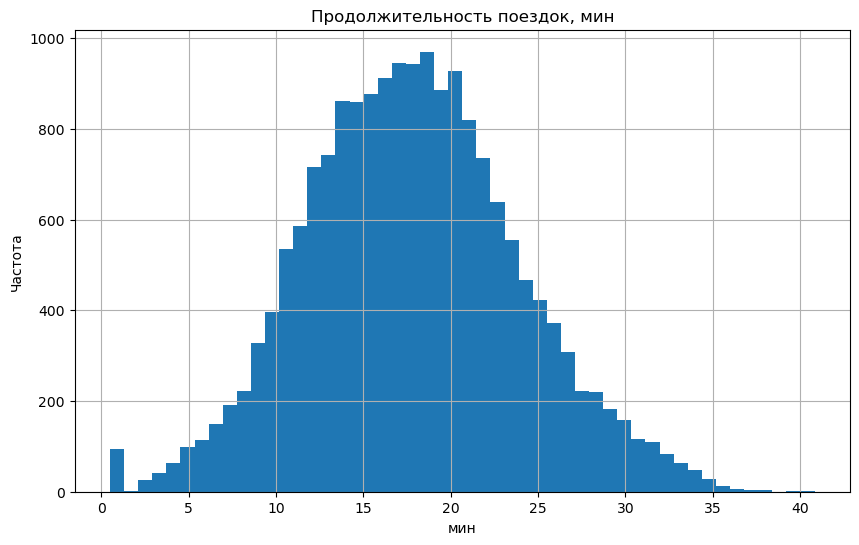

In [23]:
plt.figure(figsize=(10, 6))

rides['duration'].plot(kind='hist', bins=50)

plt.grid(axis='y')  
plt.grid(axis='x')  
plt.title('Продолжительность поездок, мин')
plt.xlabel('мин')
plt.ylabel('Частота')

plt.show()

Пик около значения в 2 минуты может указывать на пользователей, которые могли тестировать самокат или сталкиваться с проблемами, из-за которых предпочитали короткие поездки. Наиболее частыми по длительности оказались поездки длительностью около 18 минут.

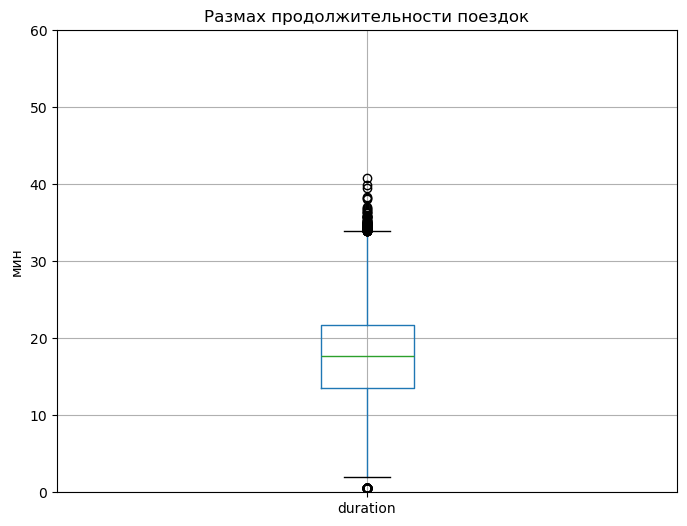

In [24]:
rides.boxplot(column='duration', figsize=(8, 6))
plt.title('Размах продолжительности поездок')
plt.ylim(0, 60)
plt.ylabel('мин')
plt.show()

In [25]:
count = (rides['duration'] < 2).sum()
print(count)
count = (rides['duration'] > 33).sum()
print(count)

95
146


Расстояния за поездку выглядят корректными.

**Вывод:** 

**Проанализировав частоту встречаемости городов, получили, что больше всего пользователей в Пятигорске, меньше всего в Москве.**

**Соотношение пользователей с подпиской и без подписки 45.6%/54.4%.**

**Данные по длительности поездок и пройденному расстоянию выглядят корректными.**

**Наиболее частыми оказались поездки протяженностью примерно 3100 метров.**

**Наиболее частыми по длительности оказались поездки длительностью около 18 минут.**

## Объединение данных

### Объединим данные о пользователях, поездках и подписках в один датафрейм методом merge()

In [26]:
#объединим пользователей и поездки по user_id
merged_df = pd.merge(users, rides, on='user_id', how='left')

#объединим полученный DataFrame с подписками по subscription_type
final_df = pd.merge(merged_df, subscriptions, on='subscription_type', how='left')

print(len(final_df)) #проверяем размер полученного датафрейма
final_df.head(20)

18068


,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199
5,1,Кира,22,Тюмень,ultra,2770.890808,16.650138,2021-10-09,10,6,0,199
6,1,Кира,22,Тюмень,ultra,3039.020292,14.927879,2021-10-19,10,6,0,199
7,1,Кира,22,Тюмень,ultra,2842.118050,23.117468,2021-11-06,11,6,0,199
8,1,Кира,22,Тюмень,ultra,3412.690668,15.238072,2021-11-14,11,6,0,199
9,1,Кира,22,Тюмень,ultra,748.690645,15.041884,2021-11-22,11,6,0,199


### Создадим ещё два датафрейма из полученного датафрейма:

•	c данными о пользователях без подписки;

•	с данными о пользователях с подпиской.

In [27]:
users_free = final_df[final_df['subscription_type']=='free']
users_free.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,2515.690719,14.944286,2021-01-02,1,8,50,0
6501,700,Айдар,22,Омск,free,846.932642,16.234663,2021-02-01,2,8,50,0
6502,700,Айдар,22,Омск,free,4004.434142,20.016628,2021-02-04,2,8,50,0
6503,700,Айдар,22,Омск,free,1205.911290,9.782872,2021-02-10,2,8,50,0
6504,700,Айдар,22,Омск,free,3047.379435,17.427673,2021-02-14,2,8,50,0


In [28]:
users_ultra = final_df[final_df['subscription_type']=='ultra']
users_ultra.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199


### Визуализируем информацию о расстоянии и времени поездок для пользователей обеих категорий.

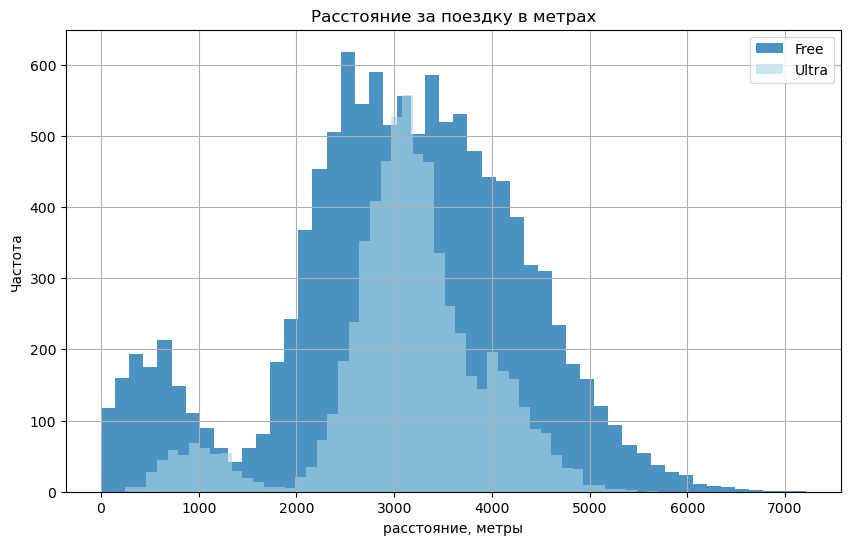

In [29]:
plt.figure(figsize=(10, 6))

users_free['distance'].plot(kind='hist', bins=50, label='Free', alpha=0.8)
users_ultra['distance'].plot(kind='hist', bins=50, label='Ultra', alpha=0.6, color='lightblue')

plt.grid(axis='y') 
plt.grid(axis='x') 
plt.title('Расстояние за поездку в метрах')
plt.xlabel('расстояние, метры')
plt.ylabel('Частота')
plt.legend()
plt.show()

**Вывод: Для обеих групп пользователей характерно наличие двух пиков, что вероятно, говорит о том, что в обеих группах пользователей самокат используется для двух разных целей, например, для того, чтобы доехать до относительно близкой цели, либо для долгих прогулок. 

**Гистограмма пользователей с подпиской более узкая, чем гистограмма пользоваталей без подписки. Вероятно, пользователям без подписки характерен больший разброс значений, чем пользоваталям с подпиской. Возможно, это связано с тем, что подписчики могут иметь более регулярные паттерны использования, например, каждый день или каждую неделю, на определенное расстояние, в то время как пользователи без подписки могут использовать сервис нерегулярно и более разнообразно.**

In [30]:
distance_free_median = users_free['distance'].median()
distance_ultra_median = users_ultra['distance'].median()

print(f'Медиана расстояния за поездку, free: {distance_free_median}')
print(f'Медиана расстояния за поездку, ultra: {distance_ultra_median}')


Медиана расстояния за поездку, free: 3114.648464847295
Медиана расстояния за поездку, ultra: 3148.6372291760854


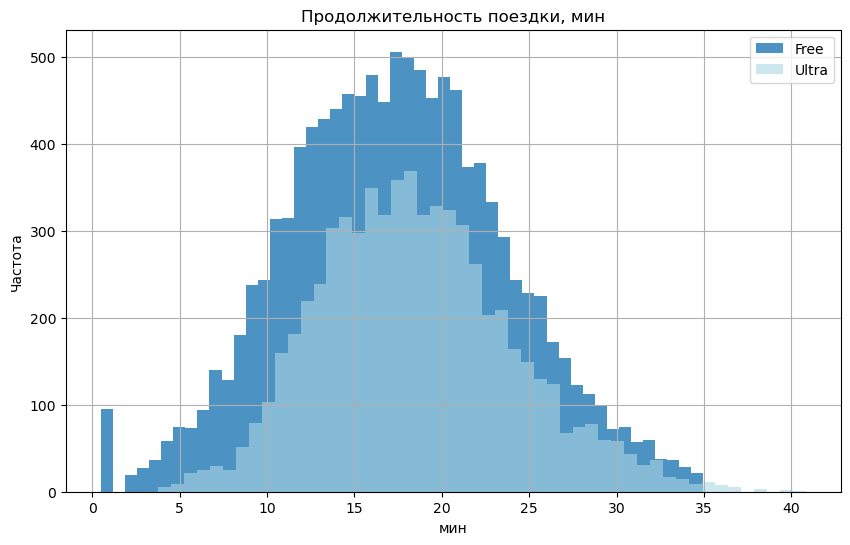

In [31]:
plt.figure(figsize=(10, 6))
users_free['duration'].plot(kind='hist', bins=50, label='Free', alpha=0.8 )
users_ultra['duration'].plot(kind='hist', bins=50, label='Ultra', alpha =0.6, color='lightblue')

plt.grid(axis='y') 
plt.grid(axis='x')  
plt.title('Продолжительность поездки, мин')
plt.xlabel('мин')
plt.ylabel('Частота')
plt.legend()
plt.show()

In [32]:
duration_free_median = users_free['duration'].median()
duration_ultra_median = users_ultra['duration'].median()

print(f'Медиана длительности поездки, free: {duration_free_median}')
print(f'Медиана длительности поездки, ultra: {duration_ultra_median}')


Медиана длительности поездки, free: 17.326890226082043
Медиана длительности поездки, ultra: 18.17815320055055


**Вывод: Поездки категории ultra незначительно более длительные по времени, чем поездки категории free. При этом в категории Ultra пратически нет поездок длительностью менее 5 минут, тогда как в категории free таких поездок достаточно.**

Посмотрим, как протяженность поездок распределяется в процентах в обеих группах пользователей.

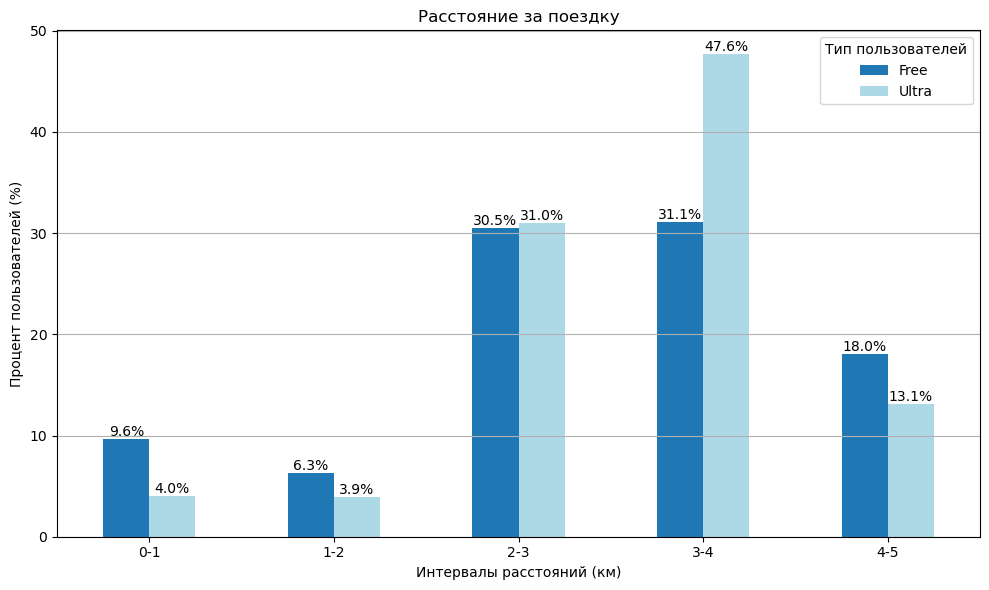

In [33]:
bins = [0, 1000, 2000, 3000, 4000, 5000]
labels = ['0-1', '1-2', '2-3', '3-4', '4-5']

df_free = pd.DataFrame(users_free, columns=['distance'])
df_free['Intervals'] = pd.cut(df_free['distance'], bins=bins, labels=labels, right=False)
frequency_table_free = 100 * df_free['Intervals'].value_counts().sort_index() / len(users_free)

df_ultra = pd.DataFrame(users_ultra, columns=['distance'])
df_ultra['Intervals'] = pd.cut(df_ultra['distance'], bins=bins, labels=labels, right=False)
frequency_table_ultra = 100 * df_ultra['Intervals'].value_counts().sort_index() / len(users_ultra)


combined_frequency = pd.DataFrame({
    'Free': frequency_table_free,
    'Ultra': frequency_table_ultra
}).fillna(0) 

colors = ['#1f77b4', 'lightblue']
ax = combined_frequency.plot(kind='bar', figsize=(10, 6), color = colors)

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.1f}%', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='bottom')

plt.title('Расстояние за поездку')
plt.xlabel('Интервалы расстояний (км)')
plt.ylabel('Процент пользователей (%)')
plt.xticks(rotation=0) 
plt.legend(title='Тип пользователей')
plt.grid(axis='y')

plt.tight_layout()
plt.show()

**Вывод: Пользователи Free совершают значительно больше поездок на короткие расстояния до 2000 метров (16,7% и 7,9%). Пользователи обеих групп совершают примерно одинаковую долю поездок протяженностью 2000-3000 метров. Пользователи с подпиской Ultra имеют значительно большую долю поездок протяженностью от 3000 до 4000 метров, но меньшую долю поездок протяженностью от 4000 метров, чем  пользователи категории Free.**

Посмотрим, как длительность поездок распределяется в процентах в обеих группах пользователей.

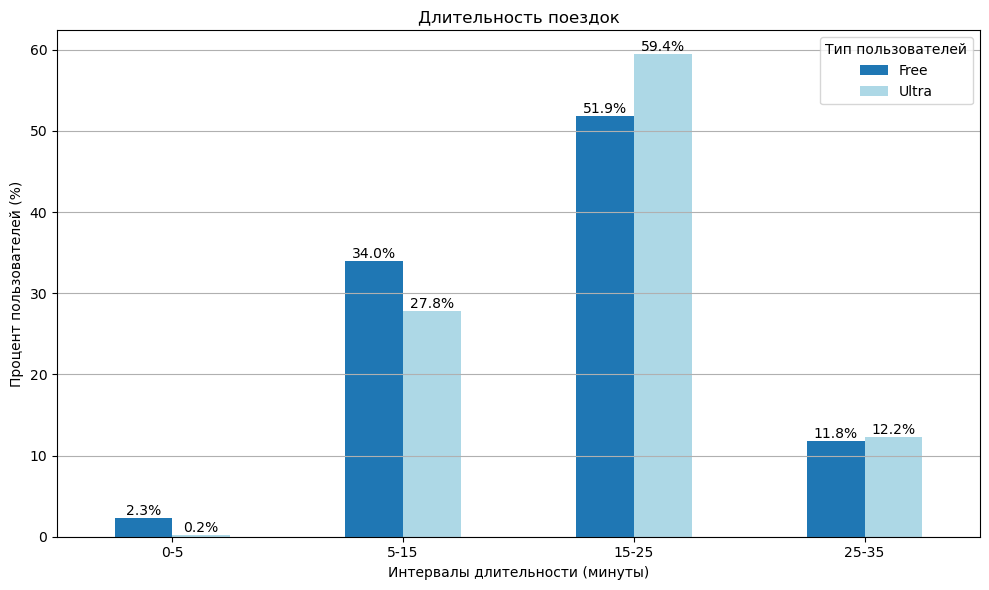

In [34]:
bins = [0, 5, 15, 25, 35]
labels = ['0-5', '5-15', '15-25', '25-35']

df_free = pd.DataFrame(users_free, columns=['duration'])

df_free = pd.DataFrame(users_free, columns=['duration'])
df_free['Intervals'] = pd.cut(df_free['duration'], bins=bins, labels=labels, right=False)
frequency_table_free = 100 * df_free['Intervals'].value_counts().sort_index() / len(users_free)

df_ultra = pd.DataFrame(users_ultra, columns=['duration'])
df_ultra['Intervals'] = pd.cut(df_ultra['duration'], bins=bins, labels=labels, right=False)
frequency_table_ultra = 100 * df_ultra['Intervals'].value_counts().sort_index() / len(users_ultra)


combined_frequency = pd.DataFrame({
    'Free': frequency_table_free,
    'Ultra': frequency_table_ultra
}).fillna(0) 

colors = ['#1f77b4', 'lightblue']
ax = combined_frequency.plot(kind='bar', figsize=(10, 6), color = colors)

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.1f}%', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='bottom')

plt.title('Длительность поездок')
plt.xlabel('Интервалы длительности (минуты)')
plt.ylabel('Процент пользователей (%)')
plt.xticks(rotation=0) 
plt.legend(title='Тип пользователей')
plt.grid(axis='y')

plt.tight_layout()
plt.show()

**Вывод: Анализ времени поездкок показывает, что поездки категории Ultra в среднем имеют несколько большую продолжительность по времени по сравнению с поездками категории Free. Доля поездок в диапазоне 5-15 минут составляют 27.9% для Ultra и 34% для Free. Это говорит о том, что пользователи Free совершают более короткие поездки, хотя обе категории имеют значительную часть таких поездок. В остальном пользователи демонстрируют схожие тенденции в отношении коротких и средних поездок. Ни одна из категорий не склонна к очень длительным поездкам.**


Сделаем теперь общий вывод по шагу 4.

**Вывод: Мы объединили данные из трех датафреймов и создали два новых датафрейма: c данными о пользователях без подписки и c данными о пользователях с подпиской.**

**Обе группы пользователей показывают наличие двух основных пиков в протяженности поездок на самокатах, что указывает на разные цели использования: короткие поездки к близким местам и долгие прогулки. У пользователей с подпиской наблюдается более узкий диапазон расстояний, что говорит о том, что они используют самокаты более регулярно и целенаправленно. В то же время пользователи без подписки имеют более широкий разброс в протяженности своих поездок, что говорит о разнообразии их целей и маршрутов.**

**Пользователи Free совершают больше поездок на короткие расстояния до 2000 метров (16,7% против 7,9% у Ultra). Доли поездок на расстоянии 2000-3000 метров схожи для обеих групп. Пользователи с подпиской Ultra имеют большую долю поездок от 3000 до 4000 метров.**

**Анализ времени поездок показывает, что у пользователей Ultra средняя продолжительность поездок выше, чем у Free. Доля поездок длительностью 5-15 минут составляет 27,9% для Ultra и 34% для Free, что подтверждает, что пользователи Free чаще совершают короткие поездки. В остальном обе группы показывают схожие тенденции в отношении коротких и средних поездок, не проявляя склонности к очень длительным поездкам.**

## Подсчёт выручки

### Создадим датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4: найдем суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц. Продолжительность каждой поездки в каждой строке исходного датафрейма для подсчёта стоимости округляется до следующего целого числа.

In [35]:
final_df['duration']=np.ceil(final_df['duration']).astype(int)

In [36]:
aggregated_df = final_df.groupby(['user_id', 'month']).agg(
    total_distance=('distance', 'sum'),
    total_trips=('distance', 'count'),
    total_duration=('duration', 'sum'),
    subscription_type=('subscription_type', 'first'),
    minute_price=('minute_price', 'first'),
    start_ride_price=('start_ride_price', 'first'),
    subscription_fee=('subscription_fee','first')
    
).reset_index()

aggregated_df.head()

,user_id,month,total_distance,total_trips,total_duration,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,1,7027.511294,2,42,ultra,6,0,199
1,1,4,754.159807,1,7,ultra,6,0,199
2,1,8,6723.470560,2,46,ultra,6,0,199
3,1,10,5809.911100,2,32,ultra,6,0,199
4,1,11,7003.499363,3,56,ultra,6,0,199


### В этот же датафрейм добавим столбец с помесячной выручкой, которую принёс каждый пользователь. Для этого обратимся к информации об условиях оплаты для подписчиков и тех, у кого нет подписки. 

In [37]:
aggregated_df['total_revenue'] = (
    aggregated_df['start_ride_price'] * aggregated_df['total_trips'] +
    aggregated_df['minute_price'] * aggregated_df['total_duration'] +
    aggregated_df['subscription_fee']
)
aggregated_df.head()

,user_id,month,total_distance,total_trips,total_duration,subscription_type,minute_price,start_ride_price,subscription_fee,total_revenue
0,1,1,7027.511294,2,42,ultra,6,0,199,451
1,1,4,754.159807,1,7,ultra,6,0,199,241
2,1,8,6723.470560,2,46,ultra,6,0,199,475
3,1,10,5809.911100,2,32,ultra,6,0,199,391
4,1,11,7003.499363,3,56,ultra,6,0,199,535


**Вывод: Мы подготовили данные для дальнейшей проверки гипотез в шаге 6.**

## Проверка гипотез

Продакт-менеджеры сервиса хотят увеличить количество пользователей с подпиской. Для этого они будут проводить различные акции, но сначала нужно выяснить несколько важных моментов.

### Проверим, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверим гипотезу. Используем исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.

Нулевая гипотеза (H0): Средние значения времени, затраченного на поездку, у пользователей с подпиской и без подписки равны.

Альтернативная гипотеза (H1): Среднее время, затраченное на поездку пользователями с подпиской, превышает среднее время, затраченное пользователями без подписки.

In [38]:
users_free_sample = users_free['duration']
users_ultra_sample = users_ultra['duration']

alpha = 0.05 # уровень статистической значимости
# если p-value окажется меньше него, отвергнем гипотезу

results = st.ttest_ind(users_ultra_sample, users_free_sample, alternative='greater')

print(f'p-value: {results.pvalue}')

# проверяем p-value
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')


p-value: 1.2804098316645613e-34
Отвергаем нулевую гипотезу


**Вывод: Полученное значение p-value меньше заданного уровня значимости, поэтому можно отвергнуть нулевую гипотезу. Есть основания говорить, что пользователи с подпиской тратят больше времени на поездку.**

### Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской, за одну поездку, не превышает (меньше или равно) оптимального расстояния 3130 метров? Проверьте гипотезу и сделайте выводы.


Нулевая гипотеза (H0): среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, равно 3130 метров.

Альтернативная гипотеза (H1): среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, больше оптимального расстояния 3130 метров.

In [39]:
users_ultra_distance = users_ultra['distance']

optimal_value = 3130
alpha = 0.05 

results = st.ttest_1samp(
    users_ultra_distance, 
    optimal_value,  alternative='greater') 

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.9195368847849785
Не получилось отвергнуть нулевую гипотезу


Мы получили p_value = 0.92, оно достаточно высокое, чтобы указывать на то, что нет достаточных оснований для отклонения нулевой гипотезы, и мы не можем утверждать, что среднее растояние больше параметра optimal_value, равного 3130 метров. Таким образом, у нас нет оснований отклонить нулевую гипотезу в пользу альтернативной гипотезы, что среднее значение больше.

**Вывод: Полученные данные позволяют считать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает (меньше или равно) оптимального расстояния 3130 метров.**

### Проверьте гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. Сделайте вывод.

Нулевая гипотеза (H0): Помесячная выручка от пользователей с подпиской равно выручке от пользователей без подписки

Альтернативная гипотеза (H1): Помесячная выручка от пользователей с подпиской выше выручки от пользователей без подписки

In [40]:
revenue_free_sample = aggregated_df.loc[aggregated_df['subscription_type']=='free','total_revenue']
revenue_ultra_sample = aggregated_df.loc[aggregated_df['subscription_type']=='ultra','total_revenue']

alpha = 0.05 # уровень статистической значимости, если p-value окажется меньше него, отвергнем гипотезу

results = st.ttest_ind(revenue_ultra_sample, revenue_free_sample, alternative='greater')

print(f'p-value: {results.pvalue}')

# проверяем p-value
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')
    
#print('Средняя выручка от пользователей с подпиской:', revenue_ultra_sample.mean())
#print('Средняя выручка от пользователей без подписки:', revenue_free_sample.mean())

p-value: 1.8850394384715216e-31
Отвергаем нулевую гипотезу


**Вывод: Низкое значения p-value позволяет нам отвергнуть нулевую гипотезу в пользу альтернативной, а именно - помесячная выручка от пользователей с подпиской выше выручки от пользователей без подписки.**

### Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

Выборки в этом случае будут зависимыми, то есть парными. Парная выборка означает, что некоторая переменная измеряется дважды для одних и тех же объектов. В нашем примере это пара измерений для каждого пользователя — до и после изменения расчёта.
Чтобы проверить гипотезу о равенстве среднего генеральной совокупности для зависимых (парных) выборок в Python, применяется метод **scipy.stats.ttest_rel()**.

Ему достаточно передать всего два параметра: наборы данных до и после. Оба набора должны быть одинаковыми по размеру: каждое измерение должно быть проведено до и после изменения.

Подразумевается, что порядок объектов, для которых сделаны измерения, в обоих массивах тоже одинаковый: k-е по порядку число в первом наборе и k-е число во втором наборе — это измерения для одного и того же объекта до и после изменения.

Пример:

In [41]:
np.random.seed(42) 
before = np.random.normal(loc=3.0, scale=0.1, size=30)
after = np.random.normal(loc=2.9, scale=0.1, size=30)  

alpha = 0.05
results = st.ttest_rel(before, after, alternative='greater')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу о равенстве обращений до и после')

else:
    print('Не получилось отвергнуть нулевую гипотезу о равенстве среднего веса посылок')


p-значение: 0.0001304289905511372
Отвергаем нулевую гипотезу о равенстве обращений до и после


**Вывод:** 

**1. Выручка от подписчиков: Есть основания считать, что помесячная выручка от пользователей с подпиской превышает выручку от пользователей без подписки.**


**2. Расстояние поездок: Есть основания считать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает оптимального значения в 3130 метров.**


**3. Время поездки: Есть основания считать, что пользователи с подпиской тратят больше времени на поездки по сравнению с другими категориями пользователей.**

**4. Чтобы проверить гипотезу о равенстве среднего генеральной совокупности для зависимых (парных) выборок в Python, применяется метод scipy.stats.ttest_rel().**

## Распределения

### Задача:
Отделу маркетинга GoFast поставили задачу: нужно провести акцию с раздачей промокодов на один бесплатный месяц подписки, в рамках которой как минимум 100 существующих клиентов должны продлить эту подписку. То есть по завершении периода действия подписки пользователь может либо отказаться от неё, либо продлить, совершив соответствующий платёж. Эта акция уже проводилась ранее и по итогу выяснилось, что после бесплатного пробного периода подписку продлевают 10% пользователей. Выясните, какое минимальное количество промокодов нужно разослать, чтобы вероятность не выполнить план была примерно 5 %. Подберите параметры распределения, описывающего эту ситуацию, постройте график распределения и сформулируйте ответ на вопрос о количестве промокодов.


Минимальное количество промокодов, которые нужно разослать: 1161


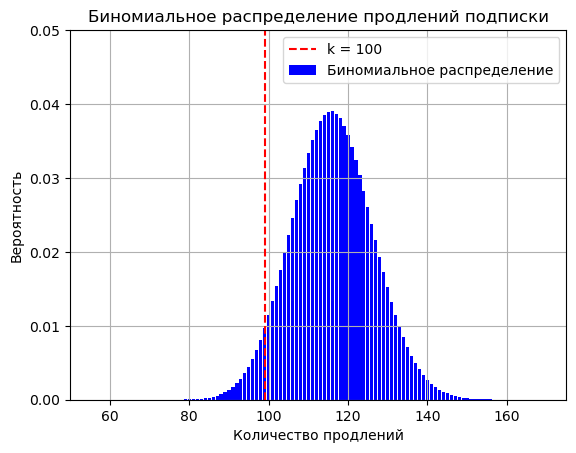

In [42]:
p = 0.1  # вероятность продления подписки
k = 100  # минимальное количество продлений
alpha = 0.05  # уровень значимости

# поиск минимального n
n = k  # начнем с k и будем увеличивать
while True:
    # вероятность того, что продлений меньше k
    prob = binom.cdf(k - 1, n, p)
    if prob < alpha:  # если вероятность меньше 5%
        break
    n += 1


print(f"Минимальное количество промокодов, которые нужно разослать: {n}")

# построение графика биномиального распределения
x = np.arange(0, n + 1)
pmf = binom.pmf(x, n, p)

plt.bar(x, pmf, label='Биномиальное распределение', color='blue')
plt.axvline(k - 1, color='red', linestyle='--', label='k = 100')
plt.title('Биномиальное распределение продлений подписки')
plt.xlabel('Количество продлений')
plt.ylabel('Вероятность')
plt.xlim(50,175)
plt.ylim(0,0.05)
plt.legend()
plt.grid()
plt.show()


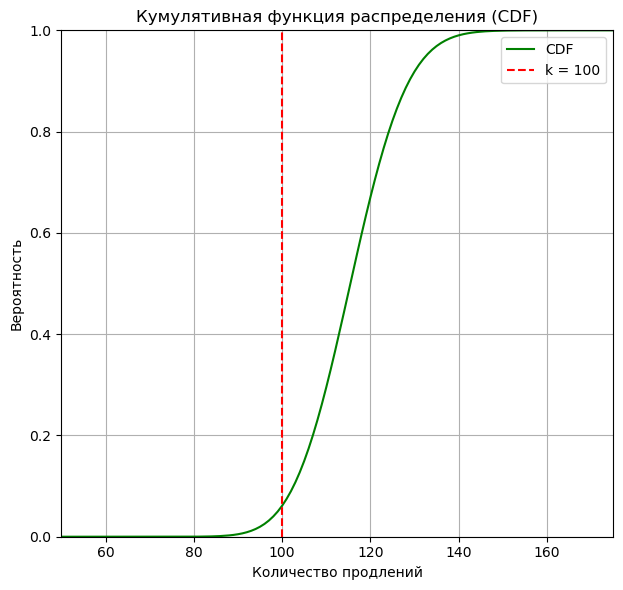

In [43]:
cdf = binom.cdf(x, n, p)
# построение графика CDF
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)  # Правый график для CDF
plt.plot(x, cdf, label='CDF', color='green')
plt.axvline(k, color='red', linestyle='--', label='k = 100')
plt.title('Кумулятивная функция распределения (CDF)')
plt.xlabel('Количество продлений')
plt.ylabel('Вероятность')
plt.xlim(50, 175)
plt.ylim(0, 1)
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

**Вывод: Мы использовали биномиальное распределение для моделирования количества продлений подписки при заданной вероятности успеха, а также кумулятивную функцию распределения для оценки необходимого количества промокодов, чтобы вероятность недостаточного количества продлений была ниже 5%. Циклический перебор помог определить минимально необходимое количество промокодов для достижения этой цели.
После выполнения кода мы получили минимальное количество промокодов 1161, которые нужно разослать для достижения цели с вероятностью не выполнения плана примерно в 5%.**


### Задача:
Отдел маркетинга рассылает клиентам push-уведомления в мобильном приложении. Клиенты могут открыть его или не открывать. Известно, что уведомления открывают около 40 % получивших клиентов. Отдел планирует разослать 1 млн уведомлений. С помощью аппроксимации постройте примерный график распределения и оцените вероятность того, что уведомление откроют не более 399,5 тыс. пользователей.



Вероятность того, что уведомление откроют не более 399,5 тыс. пользователей 0.15371708296369768


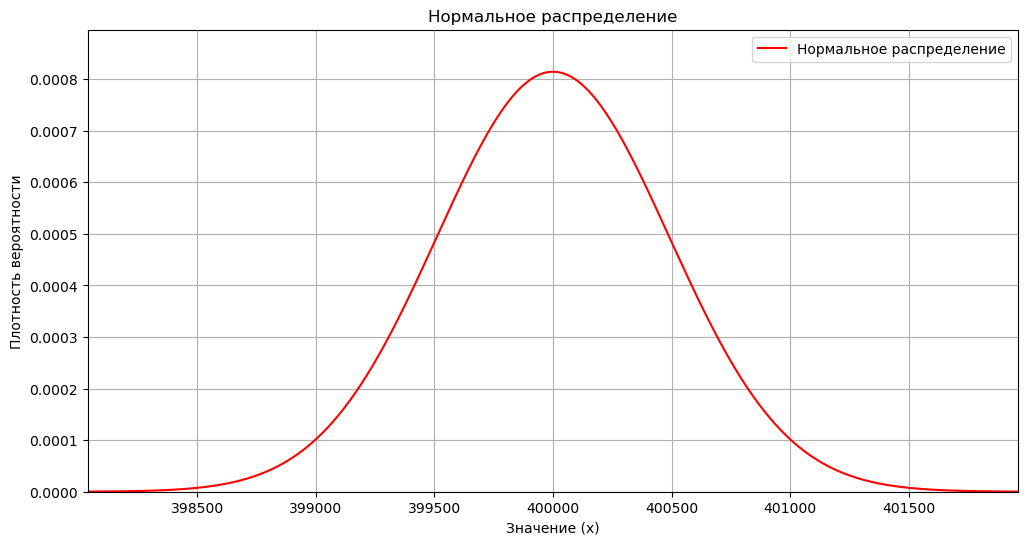

In [44]:
p = 0.4 # вероятность, что уведомление откроют
n = 1_000_000

mu = n * p
sigma = np.sqrt(n * p * (1 - p))
distr = st.norm(mu, sigma) 

# значение, для которого хотим найти вероятность
x = 399_500

# считаем вероятность получить значение, равное x или меньше 
result = distr.cdf(x)

print('Вероятность того, что уведомление откроют не более 399,5 тыс. пользователей', result)

#  массив значений для нормального распределения
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
norm_probs = norm.pdf(x, mu, sigma)

plt.figure(figsize=(12, 6))
plt.plot(x, norm_probs, label='Нормальное распределение', color='red')
plt.title('Нормальное распределение')
plt.xlabel('Значение (x)')
plt.ylabel('Плотность вероятности')
plt.xlim(mu - 4*sigma, mu + 4*sigma)
plt.ylim(0, max(norm_probs) * 1.1)
plt.grid()
plt.legend()
plt.show()

**Вывод: Вероятность того, что уведомление откроют не более 399,5 тыс. пользователей 0.1537.**

Теперь рассмотрим графически, насколько хорошо работает аппроксимация.

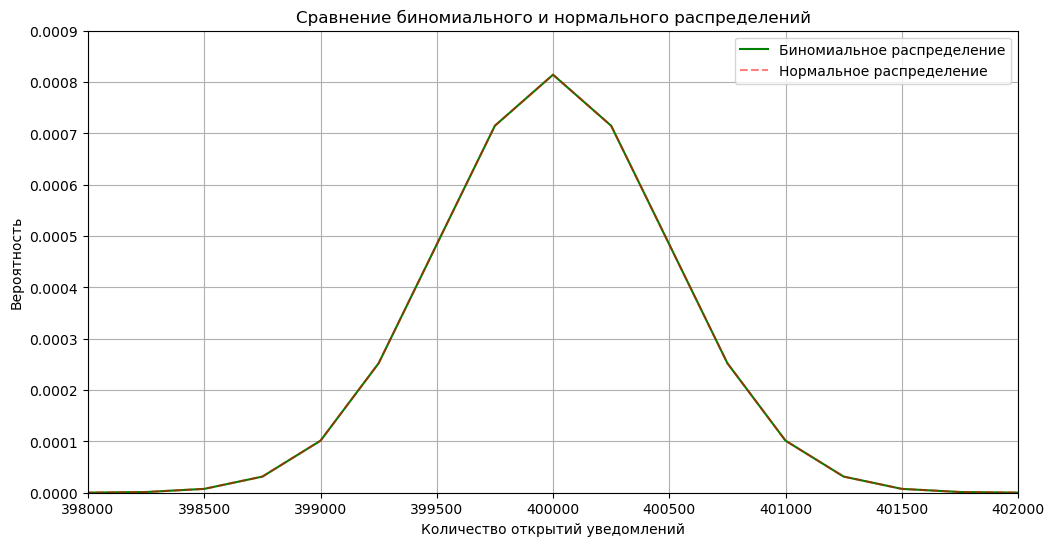

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom, norm

n = 1_000_000 
p = 0.4 # вероятность, что уведомление откроют

# параметры нормального распределения
mu = n * p
sigma = np.sqrt(n * p * (1 - p))

# значения k для биномиального распределения
k_values = np.arange(0, n + 1, 250)

# биномиальное распределение
binom_probs = binom.pmf(k_values, n, p)

# нормальное распределение
norm_probs = norm.pdf(k_values, mu, sigma)

# построение графиков
plt.figure(figsize=(12, 6))
plt.plot(k_values, binom_probs, label='Биномиальное распределение',color='green')
plt.plot(k_values, norm_probs, label='Нормальное распределение', alpha=0.5, linestyle='--',color='red')
plt.xlabel('Количество открытий уведомлений')
plt.ylabel('Вероятность')
plt.title('Сравнение биномиального и нормального распределений')
plt.xlim(398000,402000)
plt.ylim(0, 0.0009)
plt.grid()
plt.legend()
plt.show()

Аппрокимация выглядит корректной.

**Вывод: Вероятность того, что уведомление откроют не более 399,5 тыс. пользователей составляет примерно 15%. Значение, для которого мы искали вероятность очень близко к математическому ожиданию 400 тысяч, то есть наиболее часто наблюдаемому значению. Но тем не менее даже для большого числа экспериментов, у нас остается все еще довольно значимая вероятность получить менее 399,5 тысяч открытых уведомлений, и эта вероятность равна 15%. Отделу маркетинга стоит дать рекомендацию уточнить, насколько их устраивает такая вероятность не достичь целевого показателя 399500 открытий, и в случае, если она их не устроит, задать необходимый уровень значимости. Это может быть, например, 5% или 1%.** 

## Выводы:

1. Были подключены необходимые библиотеки для работы с данными и визуализации, такие как Pandas, Matplotlib, Seaborn, NumPy и SciPy. Созданы три датафрейма с данными о 1565 пользователях, 18068 поездках и двух типах подписок.


2. Предобработка данных:
   - Преобразован столбец date к типу datetime.
   - Создан новый столбец month для дальнейшей агрегации данных.
   - Проведена проверка на наличие пропущенных значений — все датафреймы оказались полными.
   - Обнаружены и обработаны 31 дубликат в датафрейме пользователей.
   

3. Анализ данных:
   - Определена частота пользователей по городам: большинство в Пятигорске(226), наименьшее количество в Москве(172).
   - Выявлено соотношение пользователей с подпиской и без подписки (45.6% на 54.4%).
   - Анализ длительности поездок показал, что наиболее частыми являются поездки длиной около 3100 метров и длительностью около 18 минут.


4. Объединение данных: 
   - Созданы два новых датафрейма: один для пользователей без подписки, другой — для подписчиков.
   - Обе группы показывают наличие двух пиков в протяженности поездок, что указывает на разные цели использования самокатов.
   - Пользователи с подпиской имеют более узкий диапазон расстояний, что свидетельствует о наличии паттерна использования самокатов.
   - Пользователи Free совершают больше коротких поездок (до 2000 метров), тогда как Ultra — больше поездок на расстоянии от 3000 до 4000 метров.
   - Средняя продолжительность поездок у пользователей Ultra выше, чем у Free.
   
   

5. Подготовка данных для анализа: Данные были подготовлены для дальнейшего анализа выручки и проверки гипотез.


6. Проверка гипотез:
   - Помесячная выручка от пользователей с подпиской превышает выручку от пользователей без подписки.
   - Среднее расстояние поездок у подписчиков не превышает оптимального значения в 3130 метров.
   - Подписчики тратят больше времени на поездки по сравнению с другими пользователями.
   - Для проверки гипотезы о равенстве среднего генеральной совокупности используется метод scipy.stats.ttest_rel().


**В ходе анализа данных о пользователях и их поездках были проведены шаги по предобработке и анализу. Результаты показывают различия в поведении пользователей с подпиской и без. Помесячная выручка от пользователей с подпиской превышает выручку от пользователей без подписки. Подписчики проявляют более целенаправленное использование сервиса. В то же время пользователи без подписки демонстрируют разнообразие в целях использования, что следует учитывать при разработке новых акций или услуг.**

Вот несколько стратегий для дальнейшего развития бизнеса на основе проведенного анализа:

▎1. Улучшение предложения
   - Рассмотреть возможность введения дополнительных тарифных планов для подписчиков, предлагая различные уровни доступа и длительность подписки.

▎2. Персонализированный маркетинг
   - Использовать собранные данные для создания сегментов пользователей и разработки персонализированных предложений.
   - Направлять рекламу на пользователей, которые не завершили процесс подписки, с предложениями о скидках или бонусах.

▎3. Улучшение пользовательского опыта
   - Изучить обратную связь пользователей о сервисе и вносить изменения на основе их пожеланий. Особенно обратить внимание на слишком короткие поездки по времени. Сделать понятной и доступной процедуру аренды. Вести учет сломанных, проблемных самокатов и своевременно устранять неисправности.

▎4. Расширение географии и анализ конкурентного окружения
   - Исследовать возможность выхода на новые рынки и города с высоким потенциалом для использования самокатов.
   - Провесть анализ конкурентов для выявления их сильных и слабых сторон в Москве, чтобы привлечь больше пользоваталей.

▎5. Анализ и оптимизация ценовой политики
   - Провести тестирование различных ценовых моделей для определения оптимальной цены для подписчиков и пользователей без подписки.
   - Оценить ценовые стратегии конкурентов и адаптировать свои предложения для повышения конкурентоспособности.

**Для дальнейшего развития бизнеса стоит проанализировать отзывы клиентов и улучшить пользовательский опыт, тем самым увеличив длительность коротких поездок. Также рекомендуется провести анализ конкурентов и оптимизировать ценовую политику через тестирование и сравнительный анализ с конкурентами.** 